In [3]:
'''
#Train a simple deep CNN on the CIFAR10 small images dataset.
It gets to 75% validation accuracy in 25 epochs, and 79% after 50 epochs.
(it's still underfitting at that point, though).
'''

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import pandas as pd
import os
from google.colab import files

Using TensorFlow backend.


In [0]:
data = {}

In [7]:


batch_size = 32
num_classes = 10
epochs = 50
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    data['Dropout & Augment'] = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=len(x_train)/batch_size,
                        validation_data=(x_test, y_test),
                        workers=4)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/50
1563/1562 [==============================] - 47s 30ms/step - loss: 1.8366 - acc: 0.3241 - val_loss: 1.5355 - val_acc: 0.4440
Epoch 2/50
1563/1562 [==============================] - 46s 30ms/step - loss: 1.5595 - acc: 0.4306 - val_loss: 1.5195 - val_acc: 0.4697
Epoch 3/50
1563/1562 [==============================] - 46s 29ms/step - loss: 1.4462 - acc: 0.4794 - val_loss: 1.2670 - val_acc: 0.5456
Epoch 4/50
1563/1562 [==============================] - 46s 29ms/step - loss: 1.3735 - acc: 0.5083 - val_loss: 1.1776 - val_acc: 0.5789
Epoch 5/50
1563/1562 [==============================] - 46s 30ms/step - loss: 1.3029 - acc: 0.5346 - val_loss: 1.1230 - val_acc: 0.6028
Epoch 6/50
1563/1562 [==============================] - 46s 30ms/step - loss: 1.2442 - acc: 0.5575 - val_loss: 1.0515 - val_acc: 0.6308
Epoch 7/50
1563/1562 [==============================] - 46s 30ms/step - loss

In [8]:
batch_size = 32
num_classes = 10
epochs = 50
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    data['Dropout'] = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    data['Dropout'] = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=len(x_train)/batch_size,
                        validation_data=(x_test, y_test),
                        workers=4)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 404us/step - loss: 1.8061 - acc: 0.3364 - val_loss: 1.5144 - val_acc: 0.4476
Epoch 2/50
50000/50000 [==============================] - 20s 391us/step - loss: 1.4913 - acc: 0.4584 - val_loss: 1.3864 - val_acc: 0.4938
Epoch 3/50
50000/50000 [==============================] - 20s 393us/step - loss: 1.3591 - acc: 0.5118 - val_loss: 1.2411 - val_acc: 0.5599
Epoch 4/50
50000/50000 [==============================] - 20s 393us/step - loss: 1.2604 - acc: 0.5505 - val_loss: 1.1488 - val_acc: 0.5962
Epoch 5/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.1797 - acc: 0.5817 - val_loss: 1.1004 - val_acc: 0.6096
Epoch 6/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.1122 - acc: 0.6090 - val_loss: 1.1209 - val_acc: 0.6068
Epoch 7/50
500

In [9]:
batch_size = 32
num_classes = 10
epochs = 50
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    data['Augment'] = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=len(x_train)/batch_size,
                        validation_data=(x_test, y_test),
                        workers=4)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/50
1563/1562 [==============================] - 46s 30ms/step - loss: 1.7196 - acc: 0.3793 - val_loss: 1.4360 - val_acc: 0.4737
Epoch 2/50
1563/1562 [==============================] - 46s 29ms/step - loss: 1.4335 - acc: 0.4855 - val_loss: 1.3135 - val_acc: 0.5345
Epoch 3/50
1563/1562 [==============================] - 45s 29ms/step - loss: 1.2978 - acc: 0.5434 - val_loss: 1.1561 - val_acc: 0.5894
Epoch 4/50
1563/1562 [==============================] - 45s 29ms/step - loss: 1.1955 - acc: 0.5776 - val_loss: 1.0769 - val_acc: 0.6248
Epoch 5/50
1563/1562 [==============================] - 45s 29ms/step - loss: 1.1183 - acc: 0.6074 - val_loss: 0.9901 - val_acc: 0.6530
Epoch 6/50
1563/1562 [==============================] - 45s 29ms/step - loss: 1.0612 - acc: 0.6295 - val_loss: 0.9467 - val_acc: 0.6677
Epoch 7/50
1563/1562 [==============================] - 45s 29ms/step - loss

In [10]:
batch_size = 32
num_classes = 10
epochs = 50
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    data['Neither'] = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    data['Neither'] = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=len(x_train)/batch_size,
                        validation_data=(x_test, y_test),
                        workers=4)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.6414 - acc: 0.4116 - val_loss: 1.3951 - val_acc: 0.5009
Epoch 2/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.3268 - acc: 0.5265 - val_loss: 1.2869 - val_acc: 0.5482
Epoch 3/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.1753 - acc: 0.5844 - val_loss: 1.1233 - val_acc: 0.6070
Epoch 4/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.0606 - acc: 0.6261 - val_loss: 1.0613 - val_acc: 0.6242
Epoch 5/50
50000/50000 [==============================] - 19s 370us/step - loss: 0.9694 - acc: 0.6619 - val_loss: 0.9967 - val_acc: 0.6553
Epoch 6/50
50000/50000 [==============================] - 18s 370us/step - loss: 0.8924 - acc: 0.6910 - val_loss: 0.9265 - val_acc: 0.6769
Epoch 7/50
500

In [11]:
data

{'Augment': <keras.callbacks.History at 0x7fc21c568c18>,
 'Dropout': <keras.callbacks.History at 0x7fc21cbe7ba8>,
 'Dropout & Augment': <keras.callbacks.History at 0x7fc21ba88ba8>,
 'Neither': <keras.callbacks.History at 0x7fc21b076780>}

In [0]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 


In [0]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 150us/step
Test loss: 0.9727954257965088
Test accuracy: 0.6554


# Dense

In [0]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Flatten(input_shape=x_train.shape[1:]))


#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    data['DNN_0'] = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=len(x_train)/batch_size,
                        validation_data=(x_test, y_test),
                        workers=4)
   

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/10
1563/1562 [==============================] - 36s 23ms/step - loss: 2.0153 - acc: 0.2787 - val_loss: 1.8835 - val_acc: 0.3371
Epoch 2/10
1563/1562 [==============================] - 37s 23ms/step - loss: 1.9048 - acc: 0.3276 - val_loss: 1.8388 - val_acc: 0.3609
Epoch 3/10
1563/1562 [==============================] - 35s 22ms/step - loss: 1.8788 - acc: 0.3395 - val_loss: 1.8197 - val_acc: 0.3597
Epoch 4/10
1563/1562 [==============================] - 34s 22ms/step - loss: 1.8639 - acc: 0.3465 - val_loss: 1.8218 - val_acc: 0.3625
Epoch 5/10
1563/1562 [==============================] - 34s 22ms/step - loss: 1.8546 - acc: 0.3486 - val_loss: 1.8119 - val_acc: 0.3647
Epoch 6/10
1563/1562 [==============================] - 34s 22ms/step - loss: 1.8470 - acc: 0.3533 - val_loss: 1.7838 - val_acc: 0.3769
Epoch 7/10
1563/1562 [==============================] - 34s 22ms/step - loss

# Dense 1

In [0]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Flatten(input_shape=x_train.shape[1:]))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    data['DNN_1'] = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=len(x_train)/batch_size,
                        validation_data=(x_test, y_test),
                        workers=4)
    

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/10
1563/1562 [==============================] - 38s 24ms/step - loss: 2.0160 - acc: 0.2694 - val_loss: 1.8232 - val_acc: 0.3604
Epoch 2/10
1563/1562 [==============================] - 36s 23ms/step - loss: 1.8886 - acc: 0.3219 - val_loss: 1.7643 - val_acc: 0.3648
Epoch 3/10
1563/1562 [==============================] - 36s 23ms/step - loss: 1.8408 - acc: 0.3400 - val_loss: 1.7096 - val_acc: 0.3990
Epoch 4/10
1563/1562 [==============================] - 36s 23ms/step - loss: 1.8084 - acc: 0.3530 - val_loss: 1.6532 - val_acc: 0.4278
Epoch 5/10
1563/1562 [==============================] - 37s 23ms/step - loss: 1.7787 - acc: 0.3654 - val_loss: 1.6221 - val_acc: 0.4308
Epoch 6/10
1563/1562 [==============================] - 37s 24ms/step - loss: 1.7683 - acc: 0.3712 - val_loss: 1.6011 - val_acc: 0.4352
Epoch 7/10
1563/1562 [==============================] - 36s 23ms/step - loss

# Dense 2

In [0]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Flatten(input_shape=x_train.shape[1:]))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    data['DNN_2'] = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=len(x_train)/batch_size,
                        validation_data=(x_test, y_test),
                        workers=4)
    

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/10
1563/1562 [==============================] - 38s 24ms/step - loss: 2.0975 - acc: 0.2258 - val_loss: 1.8672 - val_acc: 0.3282
Epoch 2/10
1563/1562 [==============================] - 37s 24ms/step - loss: 1.9522 - acc: 0.2881 - val_loss: 1.8146 - val_acc: 0.3557
Epoch 3/10
1563/1562 [==============================] - 37s 24ms/step - loss: 1.9096 - acc: 0.3082 - val_loss: 1.7532 - val_acc: 0.3746
Epoch 4/10
1563/1562 [==============================] - 37s 23ms/step - loss: 1.8798 - acc: 0.3226 - val_loss: 1.7077 - val_acc: 0.4023
Epoch 5/10
1563/1562 [==============================] - 37s 24ms/step - loss: 1.8610 - acc: 0.3298 - val_loss: 1.7079 - val_acc: 0.4073
Epoch 6/10
1563/1562 [==============================] - 36s 23ms/step - loss: 1.8457 - acc: 0.3397 - val_loss: 1.6684 - val_acc: 0.4105
Epoch 7/10
1563/1562 [==============================] - 37s 24ms/step - loss

# Dense 3

In [0]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Flatten(input_shape=x_train.shape[1:]))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    data['DNN_3'] = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=len(x_train)/batch_size,
                        validation_data=(x_test, y_test),
                        workers=4)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/10
1563/1562 [==============================] - 39s 25ms/step - loss: 2.1532 - acc: 0.1888 - val_loss: 1.9382 - val_acc: 0.3077
Epoch 2/10
1563/1562 [==============================] - 38s 24ms/step - loss: 2.0022 - acc: 0.2588 - val_loss: 1.8683 - val_acc: 0.3252
Epoch 3/10
1563/1562 [==============================] - 37s 24ms/step - loss: 1.9478 - acc: 0.2911 - val_loss: 1.7931 - val_acc: 0.3744
Epoch 4/10
1563/1562 [==============================] - 37s 24ms/step - loss: 1.9178 - acc: 0.3008 - val_loss: 1.7528 - val_acc: 0.3798
Epoch 5/10
1563/1562 [==============================] - 38s 24ms/step - loss: 1.8955 - acc: 0.3119 - val_loss: 1.7987 - val_acc: 0.3712
Epoch 6/10
1563/1562 [==============================] - 39s 25ms/step - loss: 1.8837 - acc: 0.3192 - val_loss: 1.7254 - val_acc: 0.3976
Epoch 7/10
1563/1562 [==============================] - 37s 24ms/step - loss

# Dense 4

In [0]:
batch_size = 32
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

model.add(Flatten(input_shape=x_train.shape[1:]))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    data['DNN_4'] = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=len(x_train)/batch_size,
                        validation_data=(x_test, y_test),
                        workers=4)
    


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/10
1563/1562 [==============================] - 39s 25ms/step - loss: 2.2135 - acc: 0.1573 - val_loss: 2.0512 - val_acc: 0.2358
Epoch 2/10
1563/1562 [==============================] - 38s 24ms/step - loss: 2.0577 - acc: 0.2221 - val_loss: 1.9292 - val_acc: 0.2941
Epoch 3/10
1563/1562 [==============================] - 39s 25ms/step - loss: 2.0045 - acc: 0.2532 - val_loss: 1.8799 - val_acc: 0.3331
Epoch 4/10
1563/1562 [==============================] - 39s 25ms/step - loss: 1.9756 - acc: 0.2722 - val_loss: 1.8954 - val_acc: 0.3280
Epoch 5/10
1563/1562 [==============================] - 37s 24ms/step - loss: 1.9549 - acc: 0.2806 - val_loss: 1.8202 - val_acc: 0.3582
Epoch 6/10
1563/1562 [==============================] - 37s 24ms/step - loss: 1.9382 - acc: 0.2885 - val_loss: 1.8485 - val_acc: 0.3652
Epoch 7/10
1563/1562 [==============================] - 38s 24ms/step - loss

In [0]:
results = {}
for h in data:
  results[h] = data[h].history['acc']

In [12]:
data

{'Augment': <keras.callbacks.History at 0x7fc21c568c18>,
 'Dropout': <keras.callbacks.History at 0x7fc21cbe7ba8>,
 'Dropout & Augment': <keras.callbacks.History at 0x7fc21ba88ba8>,
 'Neither': <keras.callbacks.History at 0x7fc21b076780>}

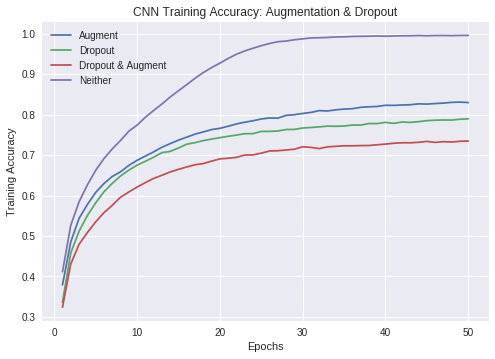

In [18]:
#Create and save plots
q1_results_test = pd.DataFrame.from_dict(results)
q1_results_test.index +=1
plot = q1_results_test.plot.line(title='CNN Training Accuracy: Augmentation & Dropout')
plot.set_xlabel("Epochs")
plot.set_ylabel("Training Accuracy")

#Display plot in Jupyter
plot

#Save plot
fig = plot.get_figure()
fig.savefig("Q4_c_test.pdf")
files.download("Q4_c_test.pdf")

In [0]:
results

{'CNN': [0.4313,
  0.5,
  0.527,
  0.5447,
  0.5394,
  0.5999,
  0.5741,
  0.6171,
  0.652,
  0.6554],
 'DNN_0': [0.3829,
  0.4176,
  0.4451,
  0.4998,
  0.5134,
  0.5549,
  0.5862,
  0.5936,
  0.5977,
  0.6171],
 'DNN_1': [0.3923,
  0.448,
  0.4867,
  0.4966,
  0.5018,
  0.5148,
  0.5163,
  0.5226,
  0.53,
  0.5329],
 'DNN_2': [0.3401,
  0.4187,
  0.4527,
  0.4763,
  0.4875,
  0.4909,
  0.5032,
  0.514,
  0.5119,
  0.5163],
 'DNN_3': [0.3227,
  0.3858,
  0.4262,
  0.4473,
  0.4645,
  0.4793,
  0.4852,
  0.4902,
  0.504,
  0.5049],
 'DNN_4': [0.2734,
  0.335,
  0.3884,
  0.4164,
  0.4354,
  0.4509,
  0.4597,
  0.4751,
  0.4747,
  0.4711]}